Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("survival"):
“installation of package ‘survival’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("survminer"):
“installation of package ‘survminer’ had non-zero exit status”
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'BiocVersion', 'ComplexHeatmap'

also installing the dependencies ‘shape’, ‘rjson’, ‘BiocGenerics’, ‘S4Vectors’, ‘iterators’, ‘circlize’, ‘GetoptLong’, ‘clue’, ‘GlobalOptions’, ‘IRanges’, ‘matrixStats’, ‘foreach’, ‘doParallel’


Old packages

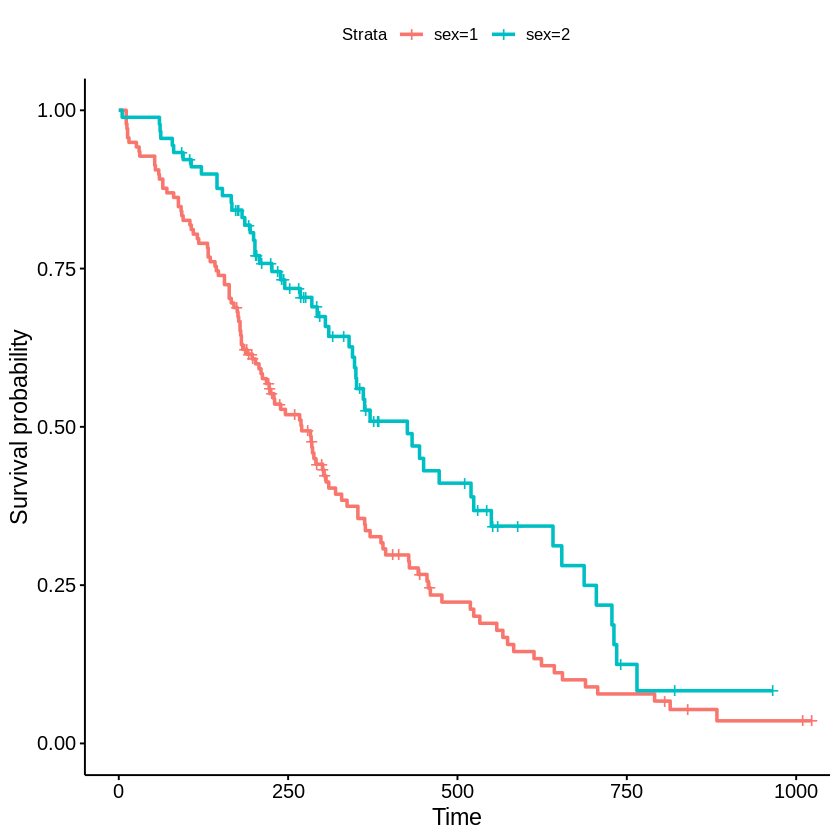

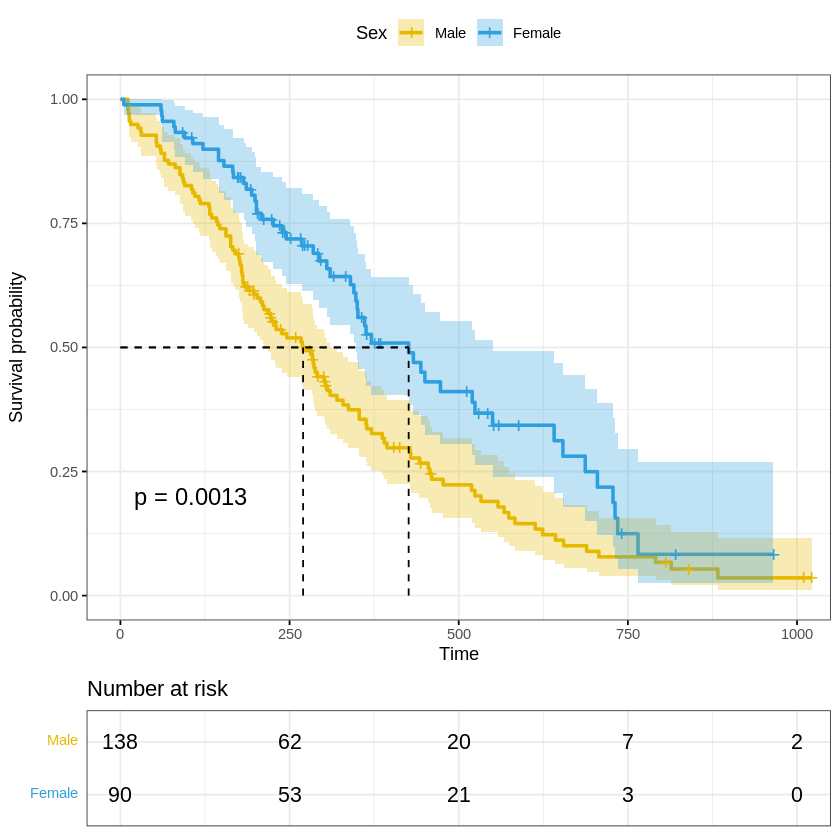

In [7]:
install.packages("BiocManager")
install.packages("survival")
install.packages("survminer")
BiocManager::install("SummarizedExperiment")
library(survival)
library(survminer)
library(SummarizedExperiment)

# Fit survival curves
fit <- survfit(Surv(time, status) ~ sex, data = lung)

# Basic survival curves
ggsurvplot(fit, data = lung)

# Customized survival curves
ggsurvplot(fit, data = lung,
           surv.median.line = "hv", # Add medians survival
           
           # Change legends: title & labels
           legend.title = "Sex",
           legend.labs = c("Male", "Female"),
           # Add p-value and tervals
           pval = TRUE,
           
           conf.int = TRUE,
           # Add risk table
           risk.table = TRUE,
           tables.height = 0.2,
           tables.theme = theme_cleantable(),
           
           # Color palettes. Use custom color: c("#E7B800", "#2E9FDF"),
           # or brewer color (e.g.: "Dark2"), or ggsci color (e.g.: "jco")
           palette = c("#E7B800", "#2E9FDF"),
           ggtheme = theme_bw() # Change ggplot2 theme
)

In [8]:
load(file = "./tcgaLIHCdata_preprocessed.RData")
class(tcgaLIHCdata)

[1] "RangedSummarizedExperiment"
attr(,"package")
[1] "SummarizedExperiment"

In [9]:
dim(tcgaLIHCdata)


[1] 29885   371

In [10]:
gexp <- assay(tcgaLIHCdata)
rowAnnotation <- rowData(tcgaLIHCdata)
colAnnotation <- colData(tcgaLIHCdata)

In [11]:
class(gexp)


[1] "matrix" "array"

In [12]:
class(rowAnnotation)


[1] "DFrame"
attr(,"package")
[1] "S4Vectors"

In [13]:

names(colAnnotation)


[1] "bcr_patient_barcode"         "gender"                     
 [3] "Age"                         "ajcc_pathologic_tumor_stage"
 [5] "OS"                          "OS.time"                    
 [7] "PFI"                         "PFI.time"                   
 [9] "OS.time.months"              "PFI.time.months"            
[11] "Tumor_Stage"                 "Stage"                      
[13] "Stage_I"                     "Stage_II"                   
[15] "Stage_III"                   "Stage_IV"                   
[17] "mRNA"                        "mRNA1"                      
[19] "mRNA2"                       "mRNA3"                      
[21] "mRNA4"                       "mRNA5"

In [14]:
colAnnotation$ajcc_stage <- colAnnotation$ajcc_pathologic_tumor_stage
idx <- colAnnotation$ajcc_stage%in%c("Stage IIIA","Stage IIIB","Stage IIIC")
colAnnotation$ajcc_stage[idx] <- "Stage III"
idx <- colAnnotation$ajcc_stage%in%c("Stage IVA","Stage IVB")
colAnnotation$ajcc_stage[idx] <- "Stage IV"
idx <- colAnnotation$ajcc_stage%in%c("[Discrepancy]")
colAnnotation$ajcc_stage[idx] <- NA
table(colAnnotation$ajcc_stage, useNA="ifany")


  Stage I  Stage II Stage III  Stage IV      <NA> 
      171        86        85         5        24 

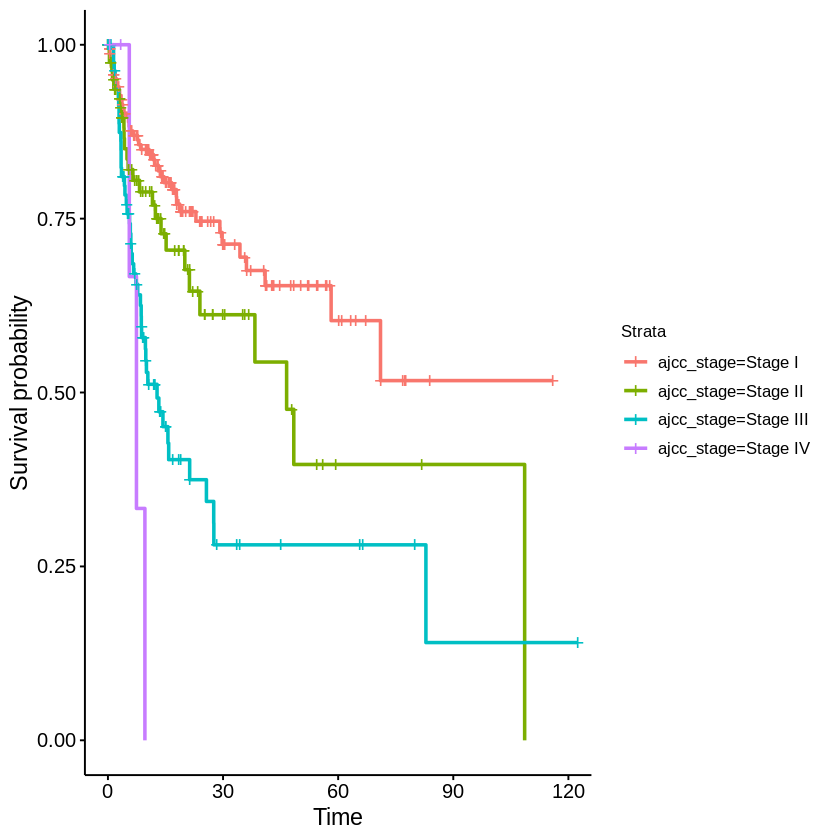

In [15]:
fit <- survfit(Surv(PFI.time.months, OS) ~ ajcc_stage, data = colAnnotation)
ggsurvplot(fit, data=colAnnotation, legend="right")


In [16]:
fit <- coxph(Surv(OS.time, OS) ~ ajcc_stage, data = colAnnotation)
fit

Call:
coxph(formula = Surv(OS.time, OS) ~ ajcc_stage, data = colAnnotation)

                      coef exp(coef) se(coef)     z        p
ajcc_stageStage II  0.3527    1.4229   0.2500 1.411  0.15832
ajcc_stageStage III 0.9844    2.6763   0.2155 4.568 4.92e-06
ajcc_stageStage IV  1.7040    5.4961   0.6002 2.839  0.00452

Likelihood ratio test=23.78  on 3 df, p=2.774e-05
n= 346, number of events= 116 
   (25 observations deleted due to missingness)

Warning message in .get_data(model, data = data):
“The `data` argument is not provided. Data will be extracted from model fit.”


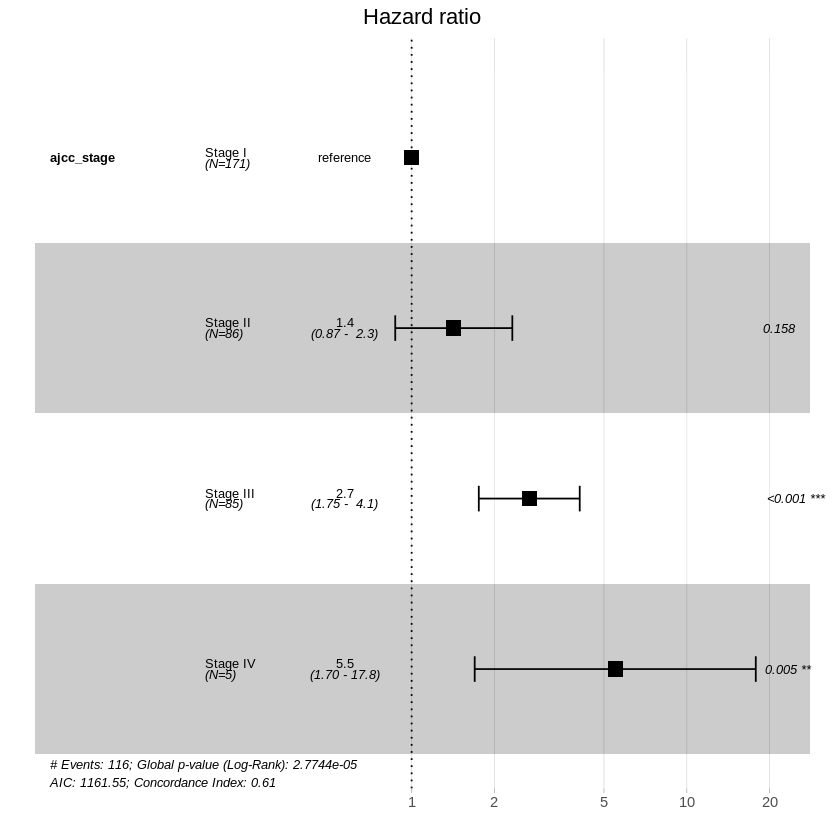

In [17]:
ggforest(fit)
